<font size=5>**Чалова Ирина ИМБО-01-19**

# **Прикладные задачи нелинейной динамики**
## **Лабораторная работа №10. Фрактальная размерность и вычислительные алгоритмы ее оценки**
### **Фрактальная размерность и вычислительные алгоритмы ее оценки на примере функций Вейерштрасса, Мандельброта и простейшей модели имитации броуновского движения.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integr
from math import trunc, ceil
import seaborn as sns

sigma = 1
mu = 0

In [2]:
N = 900
x0 = 0
y0 = 0

x = [x0]
y = [y0]

for _ in range(N):
    x.append(x[-1] + np.random.normal(mu, sigma, size=1)[0])
    y.append(y[-1] + np.random.normal(mu, sigma, size=1)[0])

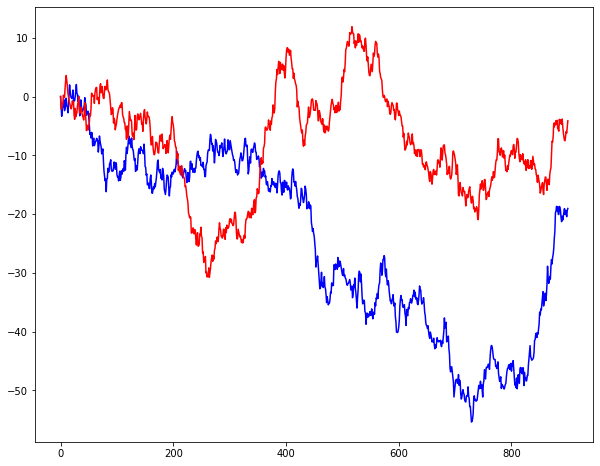

In [3]:
fig = plt.figure(figsize=(10, 8))

plt.plot(x, c='b')
plt.plot(y, c='r')
plt.show()

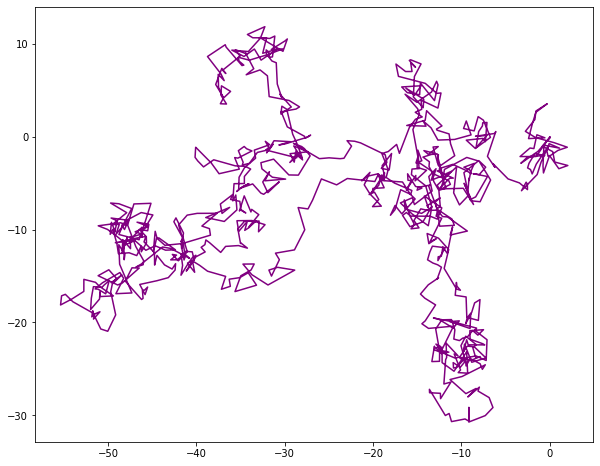

In [4]:
fig = plt.figure(figsize=(10, 8))

plt.plot(x, y, c='purple')
plt.show()

In [5]:
N = 1500
x0 = 1
y0 = 1

x = [x0]
y = [y0]

for _ in range(N):
    x.append(x[-1] + np.random.normal(mu, sigma, size=1)[0])
    y.append(y[-1] + np.random.normal(mu, sigma, size=1)[0])

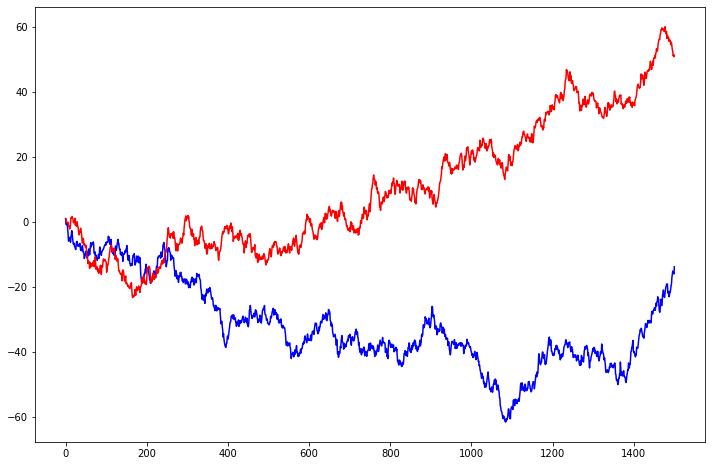

In [6]:
fig = plt.figure(figsize=(12, 8))

plt.plot(x, c='b')
plt.plot(y, c='r')
plt.show()

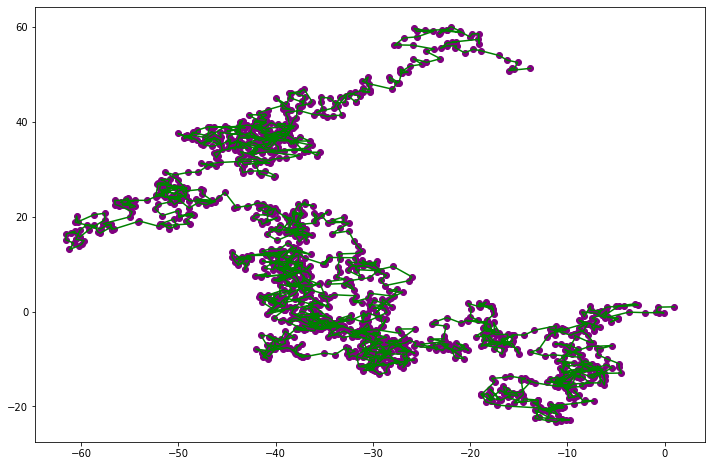

In [7]:
fig = plt.figure(figsize=(12, 8))

plt.plot(x, y, c='g')
plt.scatter(x, y, c='purple')
plt.show()

In [8]:
N = 1500
x0 = 1
y0 = 1
delta = 850

In [9]:
L = []
deltaX = []
for j in range(1, delta + 1):
    m = trunc(N / j)
    r = np.sqrt((y[N] - y[m * j]) ** 2 + (x[N] - x[m * j]) ** 2)
    cs1 = 0
    cs2 = 0
    deltax = (x[1] - x[0]) / N * j
    for n in range(1, m):
        cs1 += np.sqrt((y[n * j] - y[(n - 1) * j]) ** 2 + (x[n * j] - x[(n - 1) * j]) ** 2)
    L.append(cs1 + r)
    deltaX.append(deltax)

AL = np.log(L)
deltaX = np.log(np.abs(deltaX))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


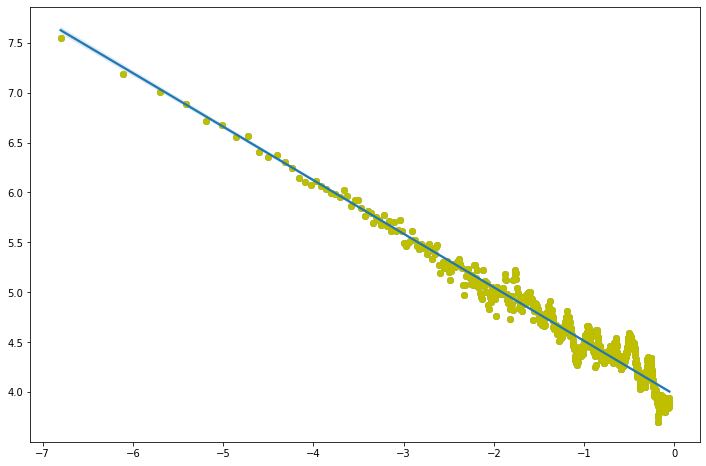

In [10]:
fig = plt.figure(figsize=(12, 8))

sns.regplot(deltaX, AL)
plt.scatter(deltaX, AL, c='y')

In [11]:
t = np.tan(2.4)
x = [x for x in range(-7, 0, 1)]
line = [ -0.66 * xx + 3.4 for xx in x]

DD = 1 - -0.66

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


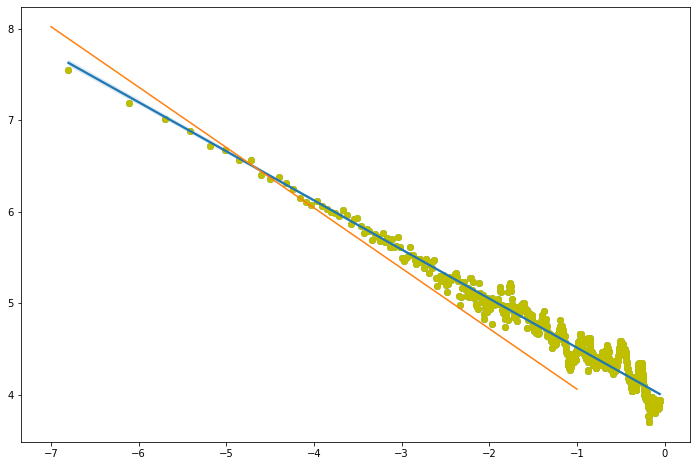

In [12]:
fig = plt.figure(figsize=(12, 8))

sns.regplot(deltaX, AL)
plt.scatter(deltaX, AL, c='y')
plt.plot(x, line)

In [13]:
eps = lambda n, x: trunc(len(x) / n)


In [14]:
def NN(n, x, y):
    m = 100
    M = 100
    for i in range(n):
        A = abs(y[eps(n, x) * i] - y[eps(n, x) * (i - 1) + 1]) / eps(n, x)
        m = m + ceil(A)
    return m

In [17]:
D1 = (np.log(NN(200, x, y)) - np.log(NN(20, x, y))) / (-np.log(eps(200, x)) + np.log(eps(20, x)))
print(1 + D1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


OverflowError: ignored

In [18]:
Ls = []
deltaX = []
for j in range(1, delta + 1):
  m = int(np.floor(N / j))
  deltax = (x[1] - x[0]) / N * j
  r = np.sqrt((y[N-1] - y[(m * j) - 1]) ** 2 + (x[N-1] - x[(m * j) - 1]) ** 2)
  # L = np.sum([np.sqrt((y[n * j] - y[(n - 1) * j]) ** 2 + deltax ** 2) + r for j in range(1, m)])
  Ls.append(np.log(np.sum([np.sqrt((y[n * j] - y[(n - 1) * j]) ** 2 + deltax ** 2) + r for n in range(1, m)])))
  deltaX.append(np.log(deltax))

IndexError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


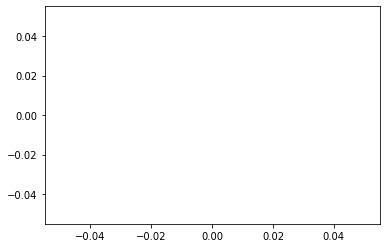

In [19]:
# fig = plt.figure(facecolor="white")
# plt.title('Анаморфоза для хаотического движения частиц по методу Ричардсона')
sns.regplot(deltaX, Ls, color='b')
# plt.scatter(deltaX, Ls)

In [20]:

deltaX, Ls = [], []

for j in range(1, delta + 1):
  m = int(np.floor(N / j))
  deltax = (x[1] - x[0]) / N * j
  r = np.sqrt((y[N-1] - y[(m * j) - 1]) ** 2 + (x[N-1] - x[(m * j) - 1]) ** 2)
  L = 0
  for n in range(1, m):
    L += np.sqrt((y[n * j] - y[(n - 1) * j]) ** 2 + deltax ** 2) + r
  Ls.append(np.log(L))
  deltaX.append(np.log(deltax))
print(Ls)

IndexError: ignored